# Read the data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2025-05-10 16:10:44.245642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746893444.494469      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746893444.563951      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv('/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv')
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 5000 rows and 10 columns.


# Null and Duplicate Values

In [4]:
data.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [7]:
data['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

# the distribution of the target variable classes ('Moderate'or 'Good'or 'Hazardous'or 'Poor')

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

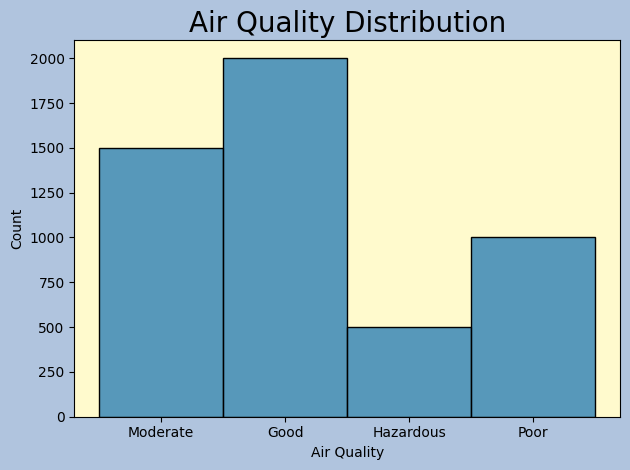

In [9]:
sns.histplot(data=data,x='Air Quality')
plt.title('Air Quality Distribution',size=20)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('lemonchiffon')
plt.show()


# Basic Descriptive Statistics

In [10]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [11]:
data.describe(include='object')

,Air Quality
count,5000
unique,4
top,Good
freq,2000


# Distribution of the Numerical Variables

/tmp/ipykernel_19/1126844518.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[features[i*4]],ax=ax1,hist=False)
/tmp/ipykernel_19/1126844518.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(data[features[i*4+1]],ax=ax2,hist=False)
/tmp/ipykernel_19/112684

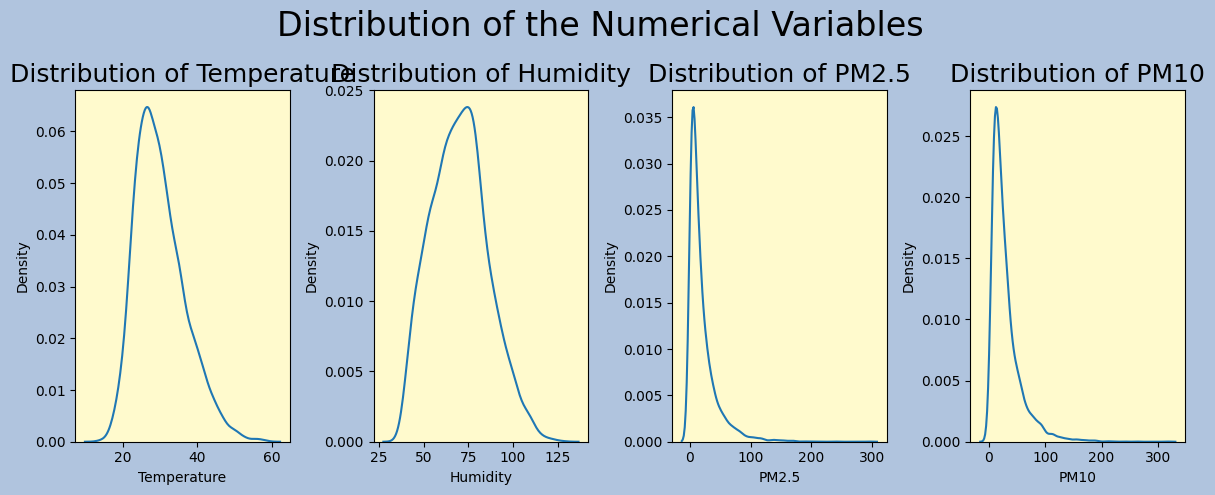

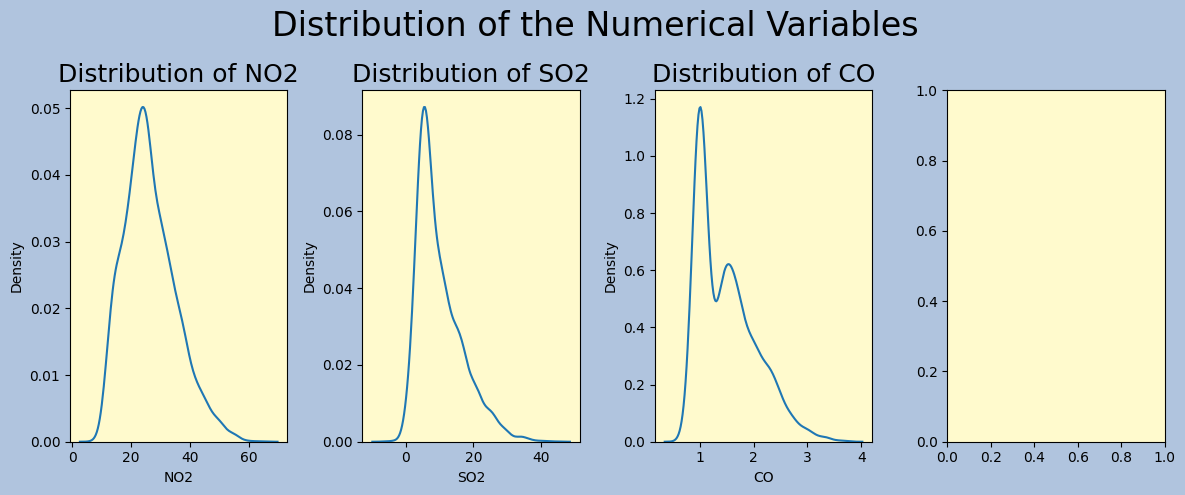

In [12]:
features = ['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO', 'Proximity_to_Industrial_Areas','Population_Density']

for i in range(2):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.distplot(data[features[i*4]],ax=ax1,hist=False)
    ax1.set_title('Distribution of '+str(features[i*4]),fontsize=18)
    ax1.set_facecolor('lemonchiffon')
    ax2 = sns.distplot(data[features[i*4+1]],ax=ax2,hist=False)
    ax2.set_title('Distribution of '+str(features[i*4+1]),fontsize=18)
    ax2.set_facecolor('lemonchiffon')
    ax3 = sns.distplot(data[features[i*4+2]],ax=ax3,hist=False)
    ax3.set_title('Distribution of '+str(features[i*4+2]),fontsize=18)
    ax3.set_facecolor('lemonchiffon')
    if i < 1: 
        ax4 = sns.distplot(data[features[i*4+3]],ax=ax4,hist=False)
        ax4.set_title('Distribution of '+str(features[i*4+3]),fontsize=18)
        ax4.set_facecolor('lemonchiffon')
    else:
        ax4.set_facecolor('lemonchiffon')
        
    fig.suptitle("Distribution of the Numerical Variables",fontsize=24)    
    
    plt.tight_layout()
    fig.set_facecolor('lightsteelblue')


# outliers

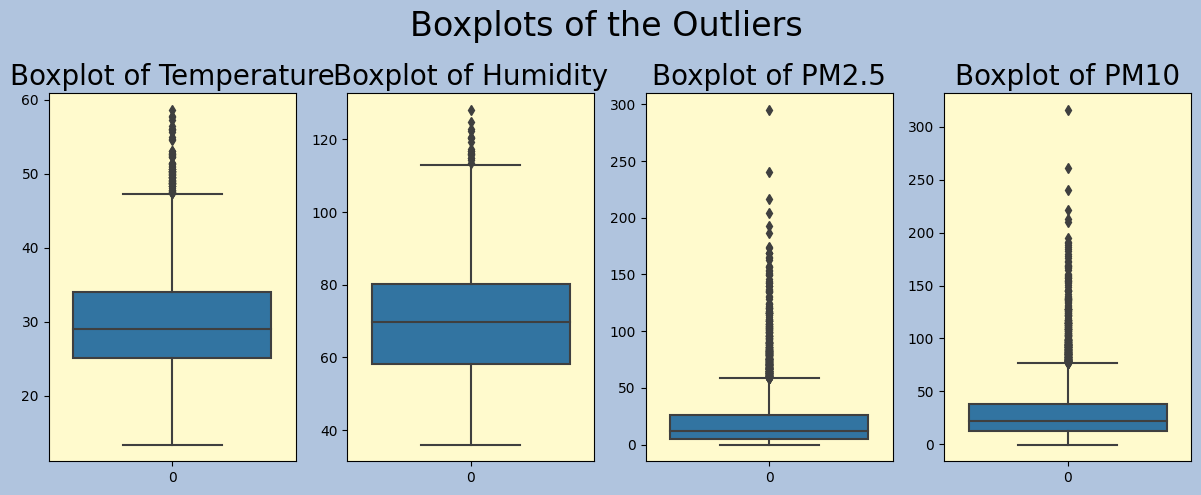

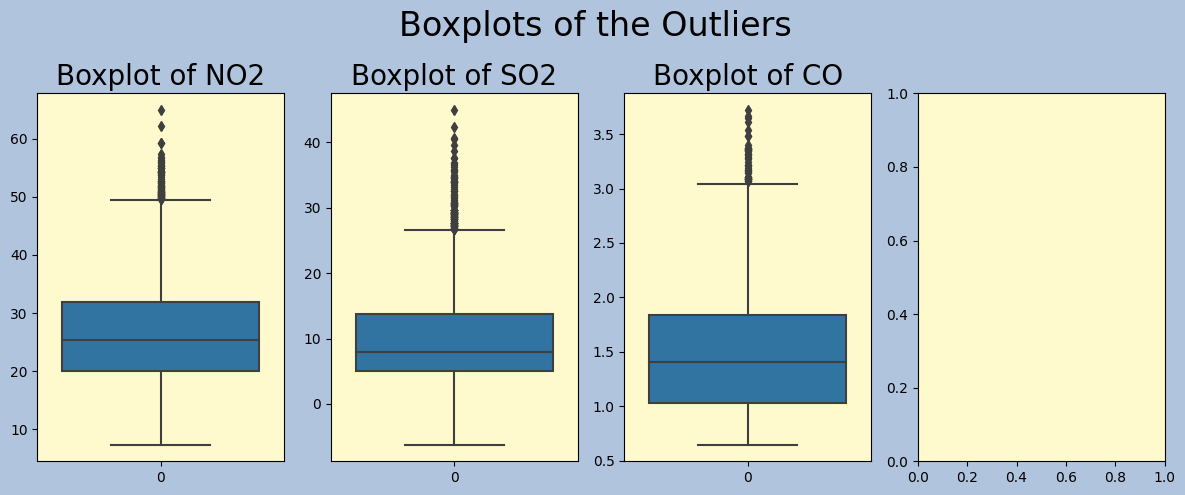

In [13]:
for i in range(2):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.boxplot(data[features[i*4]],ax=ax1)
    ax1.set_title('Boxplot of '+str(features[i*4]),fontsize=20)
    ax1.set_facecolor('lemonchiffon')
    ax2 = sns.boxplot(data[features[i*4+1]],ax=ax2)
    ax2.set_title('Boxplot of '+str(features[i*4+1]),fontsize=20)
    ax2.set_facecolor('lemonchiffon')
    ax3 = sns.boxplot(data[features[i*4+2]],ax=ax3)
    ax3.set_title('Boxplot of '+str(features[i*4+2]),fontsize=20)
    ax3.set_facecolor('lemonchiffon')
    if i < 1: 
        ax4 = sns.boxplot(data[features[i*4+3]],ax=ax4)
        ax4.set_title('Boxplot of '+str(features[i*4+3]),fontsize=20)
        ax4.set_facecolor('lemonchiffon')
    else:
        ax4.set_facecolor('lemonchiffon')
    
    fig.suptitle("Boxplots of the Outliers",fontsize=24)    
    
    plt.tight_layout()
    fig.set_facecolor('lightsteelblue')


In [14]:
def outlier_imputer(data,features):
    
    data_out = data.copy()
    
    for column in features:        
        
        # First define the first and third quartiles
        Q1 = (data_out[column].quantile(0.25)).astype(int)
        Q3 = (data_out[column].quantile(0.75)).astype(int)
        # Define the inter-quartile range
        IQR = Q3 - Q1
        # ... and the lower/higher threshold values
        lowerL = (Q1 - 1.5 * IQR).astype(int)
        higherL = (Q3 + 1.5 * IQR).astype(int)
        
        # Impute 'left' outliers
        data_out.loc[data_out[column] < lowerL,column] = lowerL
        # Impute 'right' outliers
        data_out.loc[data_out[column] > higherL,column] = higherL
        
    return data_out 

features = ['Temperature','Humidity','PM2.5','PM10','NO2','SO2', 'Proximity_to_Industrial_Areas','Population_Density']

capped_data = outlier_imputer(data,features)

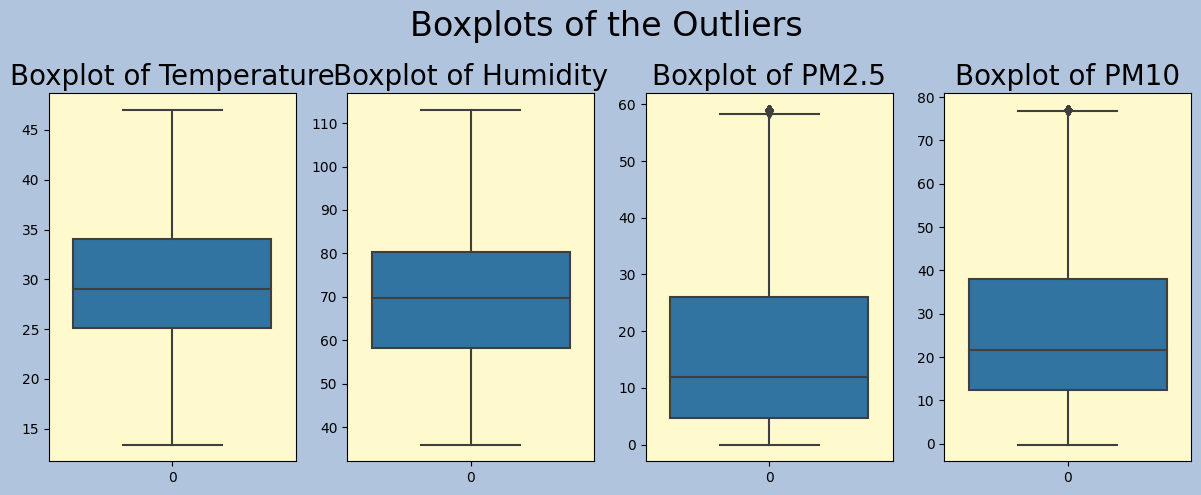

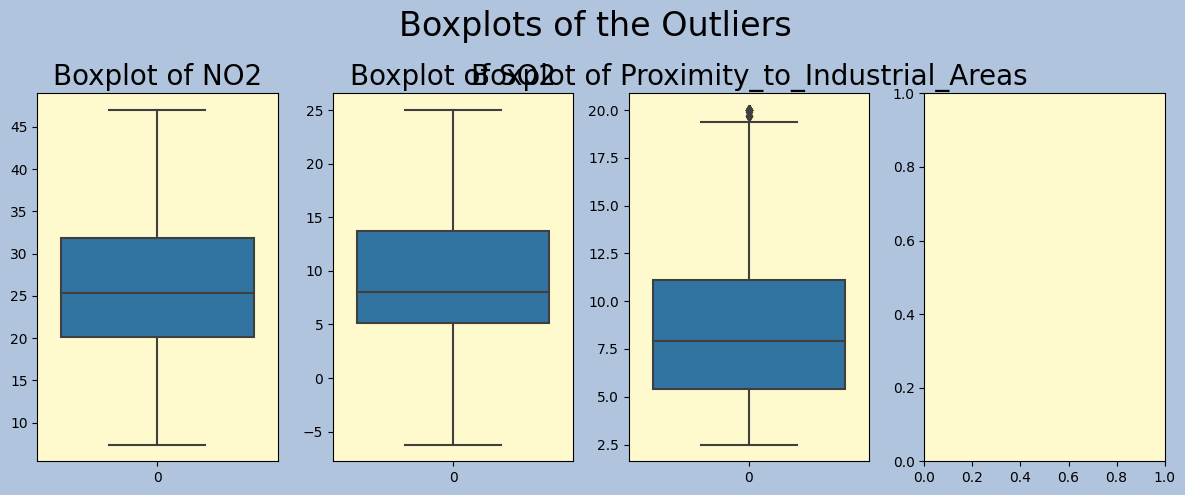

In [15]:
for i in range(2):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.boxplot(capped_data[features[i*4]],ax=ax1)
    ax1.set_title('Boxplot of '+str(features[i*4]),fontsize=20)
    ax1.set_facecolor('lemonchiffon')
    ax2 = sns.boxplot(capped_data[features[i*4+1]],ax=ax2)
    ax2.set_title('Boxplot of '+str(features[i*4+1]),fontsize=20)
    ax2.set_facecolor('lemonchiffon')
    ax3 = sns.boxplot(capped_data[features[i*4+2]],ax=ax3)
    ax3.set_title('Boxplot of '+str(features[i*4+2]),fontsize=20)
    ax3.set_facecolor('lemonchiffon')
    if i < 1: 
        ax4 = sns.boxplot(capped_data[features[i*4+3]],ax=ax4)
        ax4.set_title('Boxplot of '+str(features[i*4+3]),fontsize=20)
        ax4.set_facecolor('lemonchiffon')
    else:
        ax4.set_facecolor('lemonchiffon')
    
    fig.suptitle("Boxplots of the Outliers",fontsize=24)    
    
    plt.tight_layout()
    fig.set_facecolor('lightsteelblue')

# Correlation heatmap

In [16]:
data_feature = capped_data.copy()

## Label encoding ##
LABELS  = data_feature.columns
encoder = LabelEncoder()

for col in LABELS:
    # Check if object
    if data_feature[col].dtype == 'O':
        # Fit label encoder and return encoded labels
        data_feature[col] = encoder.fit_transform(data_feature[col])  

X = data_feature.drop('Air Quality',axis=1)
y = data_feature['Air Quality']

# Random Forest Model
random_forest = RandomForestClassifier(random_state=1,max_depth=100)
random_forest.fit(X,y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

importances


,feature,importance
6,CO,0.362
7,Proximity_to_Industrial_Areas,0.286
4,NO2,0.099
5,SO2,0.088
0,Temperature,0.063
8,Population_Density,0.037
1,Humidity,0.033
3,PM10,0.021
2,PM2.5,0.011


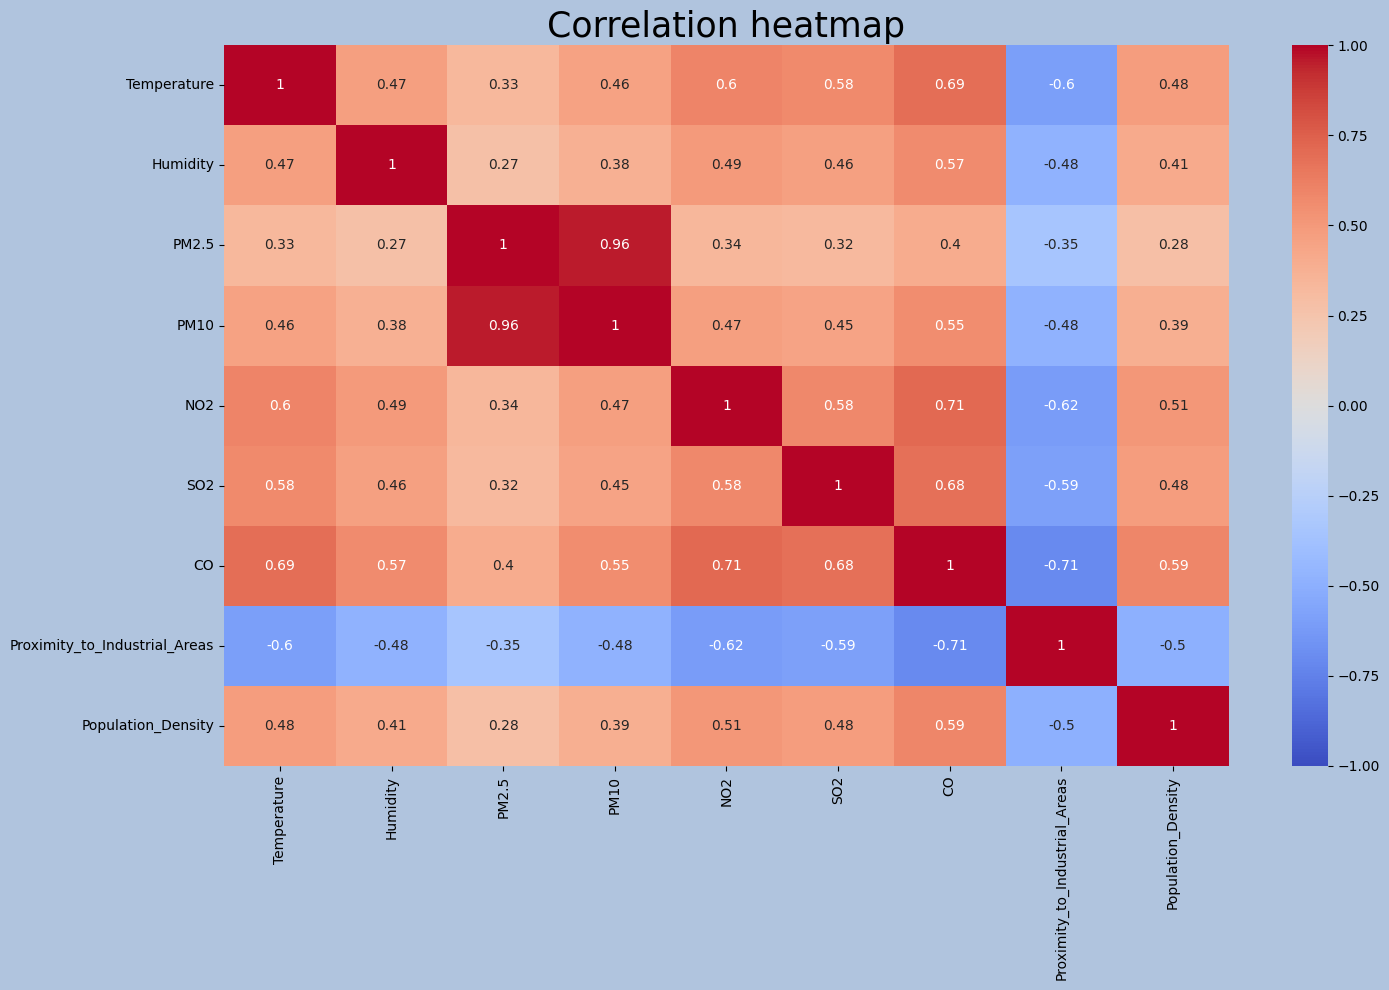

In [17]:
plt.figure(figsize=(15,10))

sns.heatmap(X.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap',fontsize=25)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.show()

# decision tree model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.902

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       409
           1       0.73      0.84      0.78       111
           2       0.92      0.93      0.92       294
           3       0.77      0.73      0.75       186

    accuracy                           0.90      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.90      0.90      0.90      1000



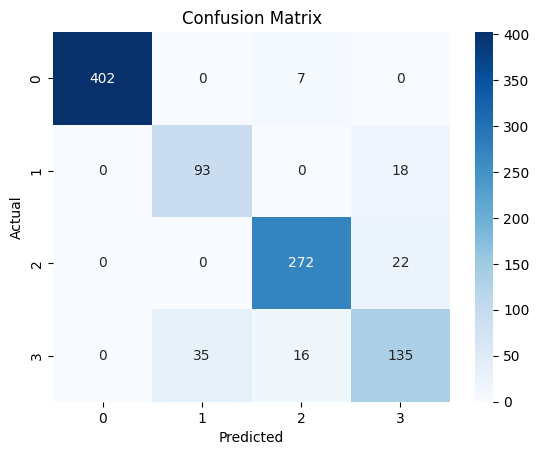

In [20]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# RandomForestClassifier

In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred_rf = rf.predict(X_test)

In [23]:
print("Baseline RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Baseline RF Accuracy: 0.958
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.91      0.89      0.90       111
           2       0.96      0.97      0.97       294
           3       0.89      0.89      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



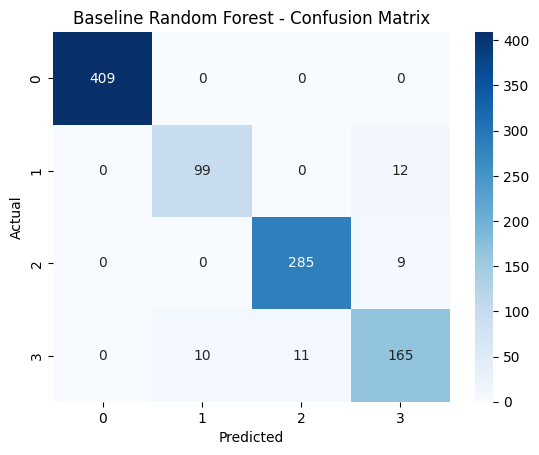

In [24]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Baseline Random Forest - Confusion Matrix")
plt.show()

# Naive Bayes

In [25]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred_nb = nb.predict(X_test)

In [27]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.936
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       409
           1       0.90      0.82      0.86       111
           2       0.94      0.94      0.94       294
           3       0.82      0.88      0.85       186

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



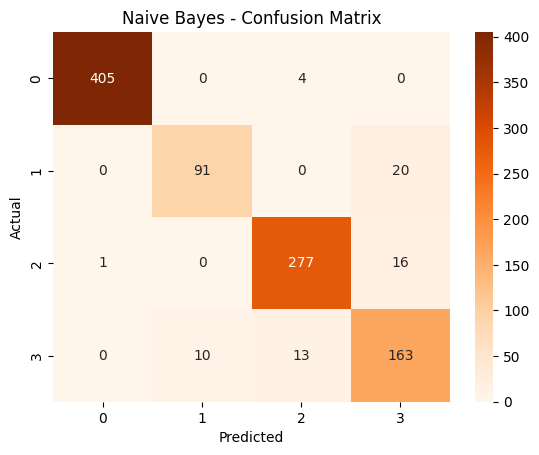

In [28]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Deep Neural Network in TensorFlow

In [29]:
X = data.drop("Air Quality", axis=1)
y = data["Air Quality"]

In [30]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746893465.207828      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746893465.208516      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50


I0000 00:00:1746893468.600091      65 service.cc:148] XLA service 0x7925f800b3c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746893468.600800      65 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746893468.600819      65 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746893468.838080      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


120/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4618 - loss: 1.1702

I0000 00:00:1746893470.433081      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5203 - loss: 1.0513 - val_accuracy: 0.8288 - val_loss: 0.4135
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.4451 - val_accuracy: 0.8813 - val_loss: 0.2791
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.3769 - val_accuracy: 0.9062 - val_loss: 0.2427
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3206 - val_accuracy: 0.9237 - val_loss: 0.2167
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.2731 - val_accuracy: 0.9225 - val_loss: 0.1983
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8995 - loss: 0.2488 - val_accuracy: 0.9325 - val_loss: 0.1829
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9081 - loss: 0.2364 - val_accuracy: 0.9287 - val_loss: 0.1873
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.2259 - val_accuracy: 0.9362 - val_

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9595 - loss: 0.1240
Test Accuracy: 0.96


In [37]:
y_pred = model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(tf.argmax(y_pred, axis=1).numpy())

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
